---

---

## Programme Title: HDIP Data Analytics (FT)

## Module Title(s): Data Preparation & Machine Learning

## Lecturer(s): Muhammad Iqbal, David McQuaid

## Student: Richard Alexander Gonzalez Saenz

## Submission Deadline Date: 28th July 2024 23:59

---

---

# Introduction

The healthcare landscape in the United States has been significantly impacted by inflation, leading to increased medical insurance costs. Predicting these costs accurately is crucial for both insurers and beneficiaries. This report analyzes a dataset containing information about insurance beneficiaries to build predictive models for insurance charges. The data preparation, feature engineering, exploratory data analysis (EDA), and machine learning modeling processes are detailed to achieve the best possible accuracy.

# Load the Dataset

We start by loading the dataset using pandas and display the first few rows to get an initial look at the data.

In [14]:
# Import necessary library
import pandas as pd

# Load the dataset from the provided Excel file
df = pd.read_excel('insurancedata.xlsx')

In [15]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

   age  gender     bmi  children smoker     region  NoClaimsBonus      charges
0   19  female  27.900       0.0    yes  southwest           0.05  16884.92400
1   18    male  33.770       1.0     no  southeast           0.20   1725.55230
2   28    male  33.000       3.0     no  southeast           0.10   4449.46200
3   33    male  22.705       0.0     no  northwest           0.05  21984.47061
4   32    male  28.880       0.0     no  northwest           0.20   3866.85520


The first few rows of the dataset are displayed to provide a quick overview of the data.

---

---

# 1. Module: Data Preparation

## 1.1 Characterisation of the data

### 1.1.1 size

Using the `.shape attribute`, we determine the number of rows and columns in the dataset.

In [23]:
# Identify the number of rows and columns in the dataset
rows, columns = df.shape

# Output the size of the dataset
print(f'The dataset contains {rows} rows and {columns} columns.')

The dataset contains 1338 rows and 8 columns.


### 1.1.2 number of attributes

We list all the column names (attributes) and provide a brief description of what each attribute represents.

In [26]:
# List the attributes
attributes = df.columns.tolist()
print('The dataset contains the following attributes:')
for attribute in attributes:
    print(f'- {attribute}')

# Describe the attributes
attribute_description = {
    'age': 'Age of the primary beneficiary under the insurance policy.',
    'gender': 'Gender of the insurance contractor (female or male).',
    'bmi': 'Body Mass Index, a numerical indication of relative body weight based on height and weight.',
    'children': 'Number of children or dependents covered by the health insurance.',
    'smoker': 'Binary variable indicating whether the beneficiary is a smoker (yes/no).',
    'region': 'Residential area of the insurance beneficiary in the US (northeast, southeast, southwest, northwest).',
    'NoClaimsBonus': 'No Claims Bonus as a percentage (5%, 10%, 15%, 20%).',
    'charges': 'Individual medical costs billed by health insurance.'
}
for attribute, description in attribute_description.items():
    print(f'{attribute}: {description}')

The dataset contains the following attributes:
- age
- gender
- bmi
- children
- smoker
- region
- NoClaimsBonus
- charges
age: Age of the primary beneficiary under the insurance policy.
gender: Gender of the insurance contractor (female or male).
bmi: Body Mass Index, a numerical indication of relative body weight based on height and weight.
children: Number of children or dependents covered by the health insurance.
smoker: Binary variable indicating whether the beneficiary is a smoker (yes/no).
region: Residential area of the insurance beneficiary in the US (northeast, southeast, southwest, northwest).
NoClaimsBonus: No Claims Bonus as a percentage (5%, 10%, 15%, 20%).
charges: Individual medical costs billed by health insurance.


The dataset contains information about health insurance costs and consists of 1338 rows and 8 columns. The columns include age, gender, BMI, number of children, smoker status, residential region, No Claims Bonus, and charges.

### 1.1.3 missing values

The `.isnull().sum()` method helps us identify if there are any missing values in the dataset.

And, the `.dropna()` method helps us remove if there are any missing values in the dataset.

In [30]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each attribute:')
print(missing_values)

Missing values in each attribute:
age               0
gender            5
bmi              12
children         10
smoker            4
region            2
NoClaimsBonus     3
charges           7
dtype: int64


- The code checks for any missing values in each column of the dataset.
- Handling these missing values is crucial for ensuring the accuracy and reliability of the analysis.

### 1.1.4 number of observations

The `.describe()` method gives us a statistical summary of each numerical attribute, including count, mean, standard deviation, minimum, and maximum values, and quartiles.

In [34]:
# Provide summary statistics for each attribute
summary_statistics = df.describe(include='all')
print('Summary statistics for each attribute:')
print(summary_statistics)

Summary statistics for each attribute:
                age gender          bmi     children smoker     region  \
count   1338.000000   1333  1326.000000  1328.000000   1334       1336   
unique          NaN      2          NaN          NaN      2          9   
top             NaN   male          NaN          NaN     no  southeast   
freq            NaN    672          NaN          NaN   1061        360   
mean      39.207025    NaN    30.692496     1.137801    NaN        NaN   
std       14.049960    NaN     6.079679     1.439507    NaN        NaN   
min       18.000000    NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000    NaN    26.336250     0.000000    NaN        NaN   
50%       39.000000    NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000    NaN    34.700000     2.000000    NaN        NaN   
max       64.000000    NaN    53.130000    20.000000    NaN        NaN   

        NoClaimsBonus       charges  
count     1335.000000   1331.00000

Summary statistics for each attribute were provided to understand the distribution and central tendencies of the data. The summary statistics include count, mean, standard deviation, minimum, and maximum values, and quartiles for numerical attributes.

## 1.2 Data Preparation

### 1.2.1 Data Cleaning

In [38]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each attribute before cleaning:')
print(missing_values)

# Since no missing values are present, no further action is required. If there were missing values, we could handle them like this:
#df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # Example for filling missing numerical values with mean

# Handling missing values (if any)
# For this example, let's assume we drop rows with missing values
df.dropna(inplace=True)
print('Number of rows after dropping missing values:', df.shape[0])

Missing values in each attribute before cleaning:
age               0
gender            5
bmi              12
children         10
smoker            4
region            2
NoClaimsBonus     3
charges           7
dtype: int64
Number of rows after dropping missing values: 1295


In [39]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each attribute after cleaning:')
print(missing_values)

Missing values in each attribute after cleaning:
age              0
gender           0
bmi              0
children         0
smoker           0
region           0
NoClaimsBonus    0
charges          0
dtype: int64


To address the missing values, rows with any missing values were removed, resulting in a dataset with 1295 rows. This step ensures that the dataset is complete and ready for analysis.

### 1.2.2 Renaming

#### 1.2.2.1 Renaming Columns

Renaming columns for better readability and consistency.

In [44]:
# Renaming columns for better readability
df.rename(columns={
    'age': 'Age',
    'sex': 'Gender',
    'bmi': 'BMI',
    'children': 'NumChildren',
    'smoker': 'Smoker',
    'region': 'Region',
    'charges': 'Charges'
}, inplace=True)

# Display the first few rows to verify column renaming
print(df.head())

   Age  gender     BMI  NumChildren Smoker     Region  NoClaimsBonus  \
0   19  female  27.900          0.0    yes  southwest           0.05   
1   18    male  33.770          1.0     no  southeast           0.20   
2   28    male  33.000          3.0     no  southeast           0.10   
3   33    male  22.705          0.0     no  northwest           0.05   
4   32    male  28.880          0.0     no  northwest           0.20   

       Charges  
0  16884.92400  
1   1725.55230  
2   4449.46200  
3  21984.47061  
4   3866.85520  


Renaming columns improves clarity, and converting categorical data to numerical is necessary for machine learning algorithms.

#### 1.2.2.2 Renaming 'Region' Column

In [47]:
# Normalize the region names to lowercase
df['Region'] = df['Region'].str.lower()

# Correct misspellings and variations
region_corrections = {
    'northteast': 'northeast',
    'southneast': 'southeast',
    'northeast': 'northeast',
    'northwest': 'northwest',
    'southwest': 'southwest',
    'southeast': 'southeast'
}

df['Region'] = df['Region'].replace(region_corrections)

# Display the first few rows to verify column renaming
print(f"Unique values for 'Region' column: {df['Region'].unique()}")

Unique values for 'Region' column: ['southwest' 'southeast' 'northwest' 'northeast']


The Region column values were normalized to lowercase, and misspellings were corrected to ensure consistency.

### 1.2.3 Removing 'Children' Samples

In [50]:
df['NumChildren'].unique()

array([ 0.,  1.,  3.,  2.,  5.,  4., 10., 12., 13., 20.])

We can see we have 10 unique values in `children` column.

We'll investigate how many values each column has.

In [53]:
# Get the count of each unique value in the NumChildren column
num_children_counts = df['NumChildren'].value_counts().sort_index()

# Convert the result to a DataFrame
num_children_counts_df = num_children_counts.reset_index()
num_children_counts_df.columns = ['NumChildren', 'Count']

# Display the resulting DataFrame
print(num_children_counts_df)

   NumChildren  Count
0          0.0    551
1          1.0    315
2          2.0    233
3          3.0    149
4          4.0     24
5          5.0     18
6         10.0      1
7         12.0      1
8         13.0      2
9         20.0      1


Count of Each Unique Number of Children


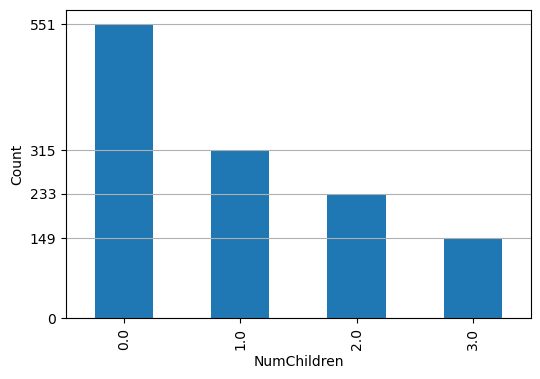

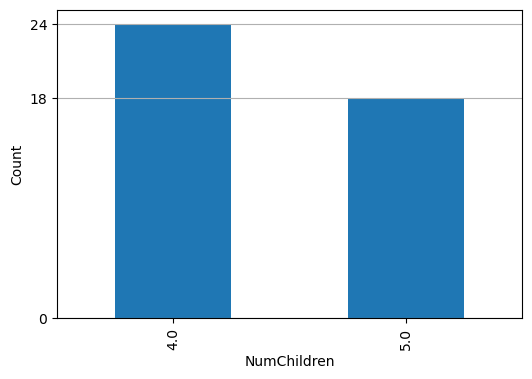

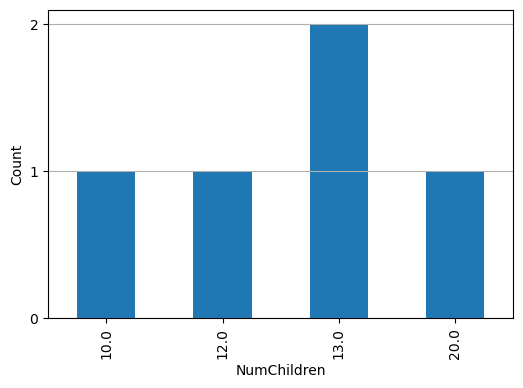

In [54]:
print("Count of Each Unique Number of Children")
num_children_counts_df[num_children_counts_df['Count'] >= 149].plot(figsize=(6,4), x='NumChildren', y='Count', kind='bar', ylabel='Count', legend=False, yticks=[0,149,233,315,551]).grid(axis='y')
num_children_counts_df[(num_children_counts_df['Count'] >= 18) & (num_children_counts_df['Count'] < 149)].plot(figsize=(6,4), x='NumChildren', y='Count', kind='bar', ylabel='Count', legend=False, yticks=[0,18,24]).grid(axis='y')
num_children_counts_df[(num_children_counts_df['Count'] >= 0) & (num_children_counts_df['Count'] < 18)].plot(figsize=(6,4), x='NumChildren', y='Count', kind='bar', ylabel='Count', legend=False, yticks=[0,1,2]).grid(axis='y')

Values in the NumChildren column greater than 5 were removed due to their rarity, which could bias the model.

In [56]:
# Remove samples where Children is greater than 5
df = df[df['NumChildren'] <= 5]
print("Unique values in 'childer' column")
df['NumChildren'].unique()

Unique values in 'childer' column


array([0., 1., 3., 2., 5., 4.])

## 1.3 EDA

### 1.3.1 Distribution

Understand the distribution of the dependent variable.

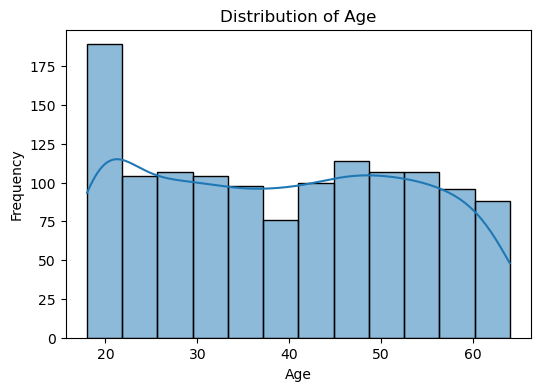

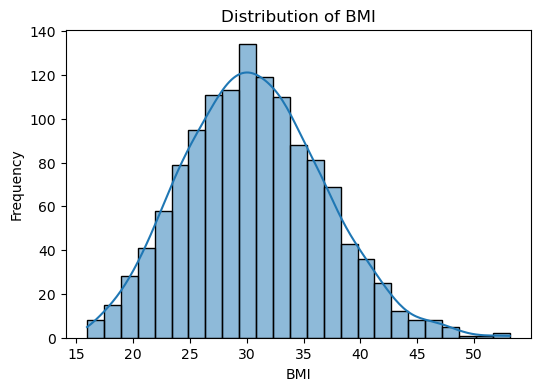

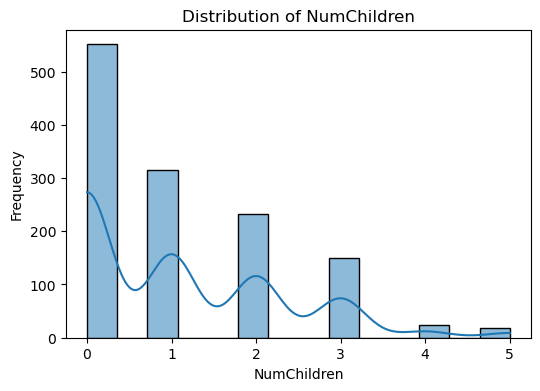

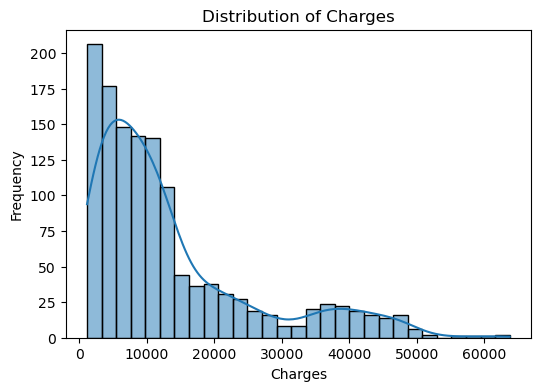

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of numerical columns
numerical_columns = ['Age', 'BMI', 'NumChildren', 'Charges']

for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

The distribution of numerical columns such as Age, BMI, NumChildren, and Charges was visualized using histograms. This helps understand the spread and skewness of these variables.

### 1.3.2 Pairplot

Explore relationships between variables.

C:\Users\richa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


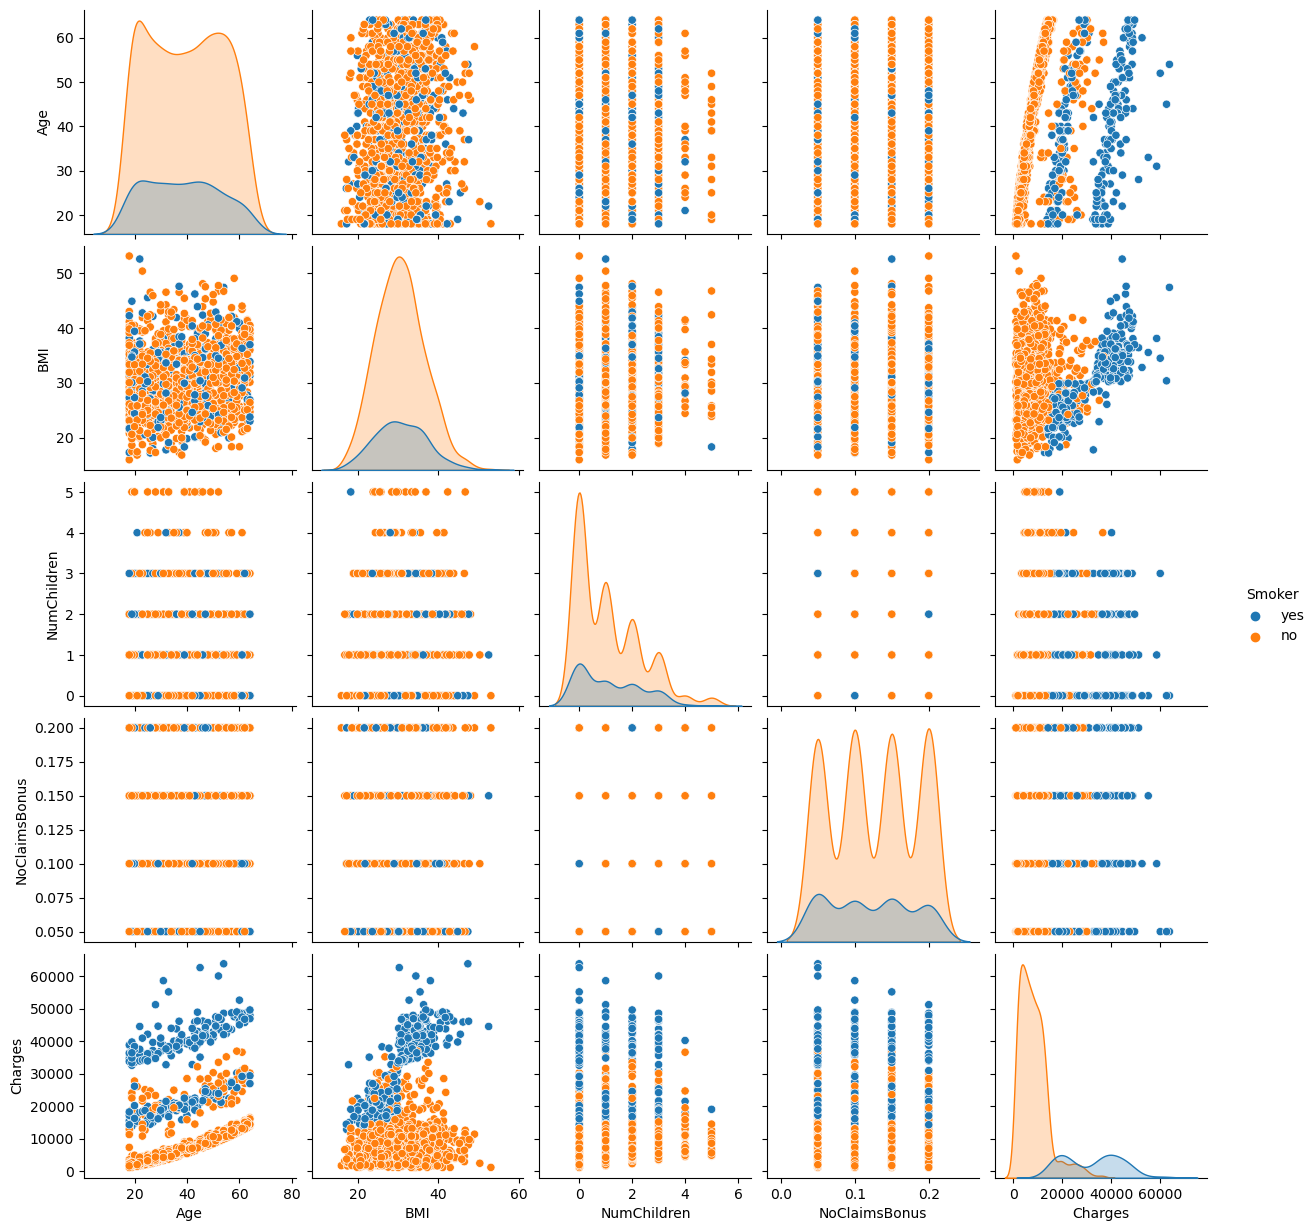

In [64]:
# Pairplot to see relationships
sns.pairplot(df, hue='Smoker')
plt.show()

A pairplot was created to explore relationships between variables, particularly focusing on the impact of the Smoker variable.

### 1.3.3 Boxplots

Detect outliers and understand the spread of data.

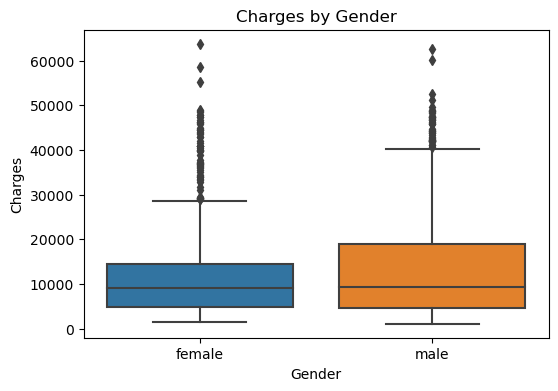

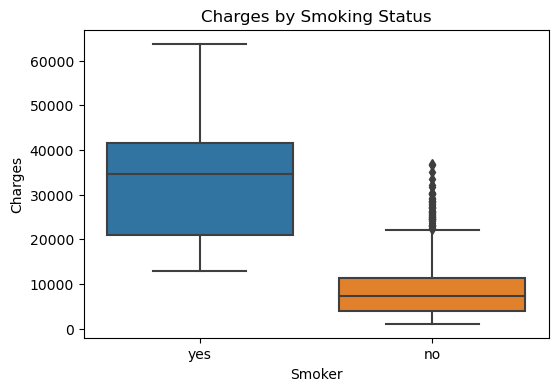

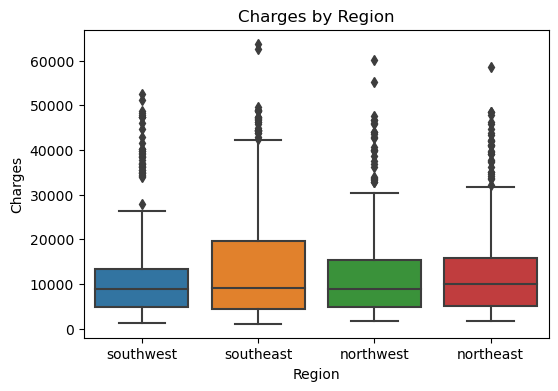

In [68]:
# Boxplot of Charges by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='gender', y='Charges', data=df)
plt.title('Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

# Boxplot of Charges by Smoking Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Smoker', y='Charges', data=df)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

# Boxplot of Charges by Region
plt.figure(figsize=(6, 4))
sns.boxplot(x='Region', y='Charges', data=df)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

Boxplots were used to detect outliers and understand the spread of Charges across different categories such as Gender, Smoker status, and Region.

### 1.3.4 Correlation Heatmap

Understand correlations between variables.

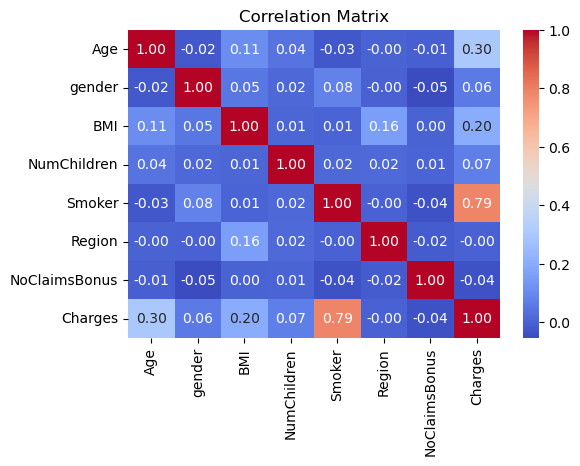

In [72]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical variables
label_encoder = LabelEncoder()

heat_map_df = df.copy()
heat_map_df['gender'] = label_encoder.fit_transform(heat_map_df['gender'])
heat_map_df['Smoker'] = label_encoder.fit_transform(heat_map_df['Smoker'])
heat_map_df['Region'] = label_encoder.fit_transform(heat_map_df['Region'])

# Visualize the correlation matrix
plt.figure(figsize=(6, 4))
corr_matrix = heat_map_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

A correlation heatmap was generated to understand the relationships between numerical variables, aiding in feature selection and identifying multicollinearity.

## 1.4 Feature engineering, Encoding and Scaling

### 1.4.1 Feature Engineering

CDC guidelines Link: https://www.cdc.gov/bmi/adult-calculator/bmi-categories.html

In [77]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Mild Obesity'
    elif 35 <= bmi < 40:
        return 'Moderate Obesity'
    else:
        return 'Severe Obesity'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)
df.head()

,Age,gender,BMI,NumChildren,Smoker,Region,NoClaimsBonus,Charges,BMI_Category
0,19,female,27.900,0.0,yes,southwest,0.05,16884.92400,Overweight
1,18,male,33.770,1.0,no,southeast,0.20,1725.55230,Mild Obesity
2,28,male,33.000,3.0,no,southeast,0.10,4449.46200,Mild Obesity
3,33,male,22.705,0.0,no,northwest,0.05,21984.47061,Normal weight
4,32,male,28.880,0.0,no,northwest,0.20,3866.85520,Overweight


The BMI column was categorized into different weight categories based on CDC guidelines: Underweight, Normal weight, Overweight, Mild Obesity, Moderate Obesity, and Severe Obesity.

### 1.4.2 Encoding

#### 1.4.2.1 Binary Categorical

In [81]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['Smoker'] = label_encoder.fit_transform(df['Smoker'])

Gender and Smoker were encoded using Label Encoding.

#### 1.4.2.2 Nominal Categorical

In [84]:
# Encode 'region' using one-hot encoding
df = pd.get_dummies(df, columns=['Region'], drop_first=False)

In [85]:
# Encode 'NoClaimsBonus' using one-hot encoding
df = pd.get_dummies(df, columns=['BMI_Category'], drop_first=False)

Region and BMI Category were encoded using One-Hot Encoding.

#### 1.4.2.3 Ordinal Categorical

In [88]:
# Encode 'NoClaimsBonus' using one-hot encoding
df = pd.get_dummies(df, columns=['NoClaimsBonus'], drop_first=False)

In [89]:
# Encode 'NoClaimsBonus' using one-hot encoding
df = pd.get_dummies(df, columns=['NumChildren'], drop_first=False)

In [90]:
# Display the first few rows of the updated dataset
df.head()

,Age,gender,BMI,Smoker,Charges,Region_northeast,Region_northwest,Region_southeast,Region_southwest,BMI_Category_Mild Obesity,...,NoClaimsBonus_0.05,NoClaimsBonus_0.1,NoClaimsBonus_0.15,NoClaimsBonus_0.2,NumChildren_0.0,NumChildren_1.0,NumChildren_2.0,NumChildren_3.0,NumChildren_4.0,NumChildren_5.0
0,19,0,27.900,1,16884.92400,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False
1,18,1,33.770,0,1725.55230,False,False,True,False,True,...,False,False,False,True,False,True,False,False,False,False
2,28,1,33.000,0,4449.46200,False,False,True,False,True,...,False,True,False,False,False,False,False,True,False,False
3,33,1,22.705,0,21984.47061,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
4,32,1,28.880,0,3866.85520,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False


NoClaimsBonus and NumChildren were also encoded using One-Hot Encoding.

### 1.4.3 Feature Scaling

#### 1.4.3.1 StandardScaler

In [94]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical columns
df_scaled = df.drop(columns=['Charges']).copy()
df_scaled[df.columns] = scaler.fit_transform(df)

Numerical features were scaled using StandardScaler to ensure they are on the same scale, which is essential for many machine learning algorithms.

## 1.5 Dimensionality Reduction: PCA and LDA

### 1.5.1 PCA

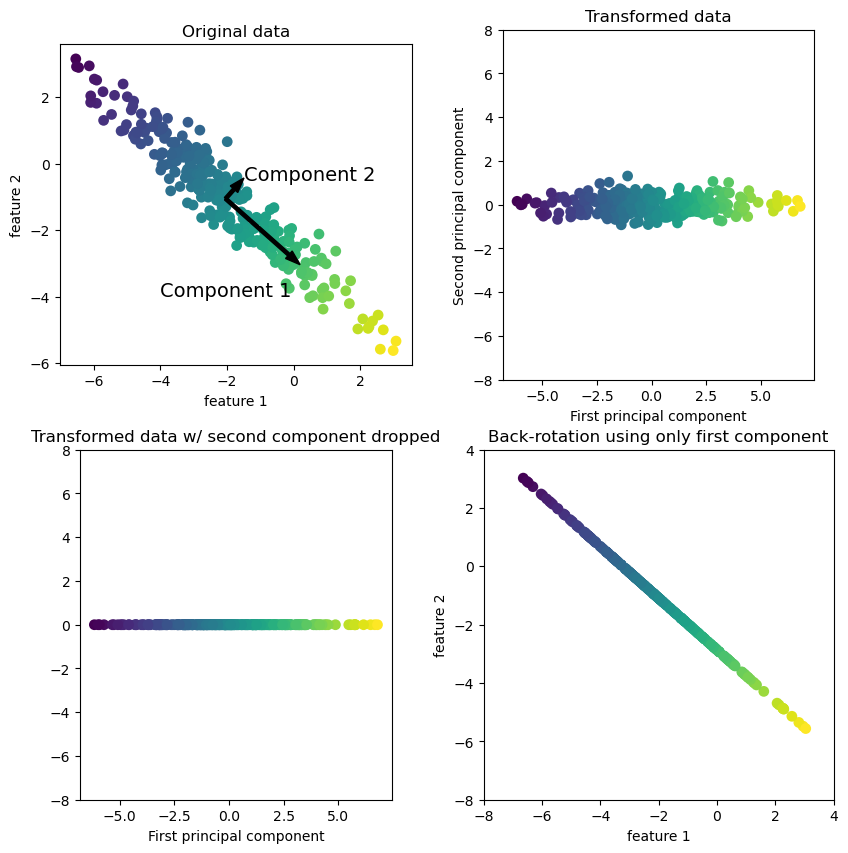

In [98]:
from mglearn import plots

plots.plot_pca_illustration()

#### 1.5.1.1 minimum number of features

In [100]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df_scaled)

PCA()

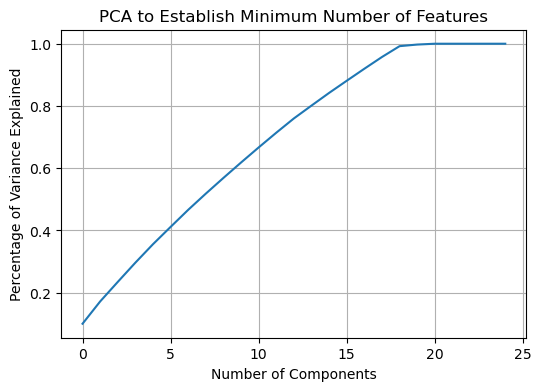

In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

plt.figure(figsize=(6, 4))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title('PCA to Establish Minimum Number of Features')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained');
plt.grid(True)

#### 1.5.1.2 Principal Component Analysis

In [103]:
# PCA
pca = PCA(n_components=20)
principal_components = pca.fit_transform(df_scaled)

In [104]:
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                                                          'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
                                                          'PC11', 'PC12', 'PC13', 'PC14', 'PC15',
                                                          'PC16', 'PC17', 'PC18', 'PC19', 'PC20'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,-0.535163,0.885948,-1.383751,0.484512,1.480006,0.627987,-1.660404,1.157840,-1.830840,-0.032049,0.206607,-1.135740,0.130450,-0.150982,0.322665,-0.802414,-1.490844,-0.975100,-1.408845,-0.576271
1,0.618491,-1.809918,1.480413,-0.393952,-1.461898,-1.255033,-0.835561,-0.671035,0.294852,0.260860,-1.536411,-1.615004,-0.891344,1.006580,-1.132477,-0.544391,-0.315378,0.120037,0.558232,-0.018002
2,0.645610,-0.637320,0.689770,-0.697134,-1.308523,0.470689,2.107209,-0.883718,-0.303143,-0.842183,-1.213060,-0.909949,2.223824,1.540500,-1.289673,-0.555661,-0.423558,-0.515401,0.789806,-0.036423
3,-1.648049,1.034688,-1.443286,-1.394382,-0.923084,0.265219,-1.154220,2.035832,-0.272462,0.471344,-1.131558,0.910719,0.477962,-0.620937,0.019070,0.171075,1.215451,-0.068030,0.115126,1.137994
4,-1.513940,-1.028216,0.358645,-1.230751,0.948314,-1.949187,-0.176962,1.744258,-0.789137,0.476866,0.549622,0.064557,-0.092363,0.392847,-0.034254,-0.912704,0.346628,0.849773,0.361091,0.045032


Text(0, 0.5, 'Principal components')

<Figure size 600x400 with 0 Axes>

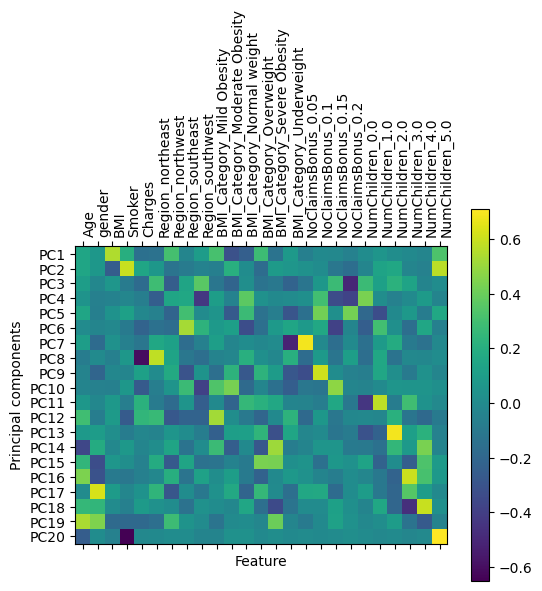

In [105]:
plt.figure(figsize=(6, 4))
plt.matshow(pca.components_, cmap='viridis')
plt.yticks(range(len(df_pca.columns)), df_pca.columns)
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### 1.5.2 LDA

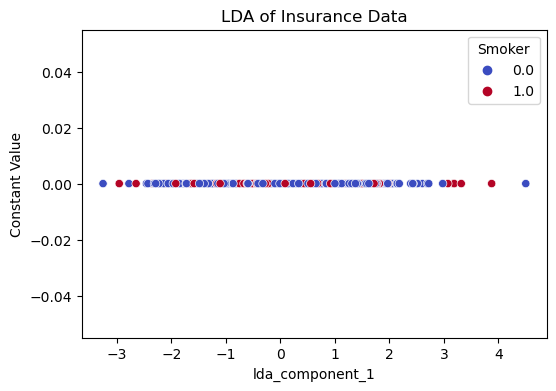

In [107]:
# LDA
# Adjust n_components to be min(n_features, n_classes - 1)
features = df.drop(columns='Charges')
n_features = features.shape[1] #7 features
n_classes = len(df['Smoker'].unique()) #2 classes (0: no-smoker, 1:smoker)
n_components_lda = min(n_features, n_classes - 1) #min(7, 2 - 1) -> 1

lda = LDA(n_components=n_components_lda)
lda_components = lda.fit_transform(features, df['Smoker'])
df_lda = pd.DataFrame(data=lda_components, columns=['lda_component_1'])
df_lda['lda_component_2'] = 0
plt.figure(figsize=(6, 4))
sns.scatterplot(x='lda_component_1', y='lda_component_2', hue=df['Smoker'], data=df_lda, palette='coolwarm')
plt.title('LDA of Insurance Data')
plt.xlabel('lda_component_1')
plt.ylabel('Constant Value')
plt.show()

In [108]:
df_lda.head()

,lda_component_1,lda_component_2
0,0.434419,0
1,-0.760708,0
2,-1.921828,0
3,-0.862026,0
4,0.234345,0


# 2. Module: Machine Learning

## 2.1 Machine Learning Approach

### 2.1.1 Supervised Learning: Regression Models

>For regression tasks, the goal is to predict a continuous number, or a floating-point
number in programming terms (or real number in mathematical terms). Predicting a
person’s annual income from their education, their age, and where they live is an
example of a regression task. (Andreas C. Müller & Sarah Guido)

Regression models were chosen to predict the continuous target variable, Charges.

### Sweet Spot

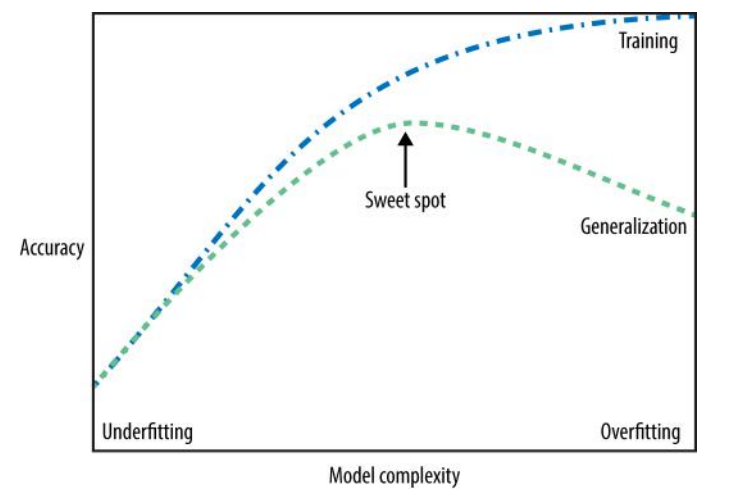

In [115]:
from IPython import display
display.Image("sweet_spot.png")

In the image, the area of the square is dedicated to searching for the right amount of model complexity that can distinguish the original data from noise. The sweet point means that the model is complex enough that it can catch the patterns of the data but not that complex that it memorizes the training data. This balance is critical in modeling to obtain high predictive performance on new, unseen data.

### Train, Validation and Test sets split

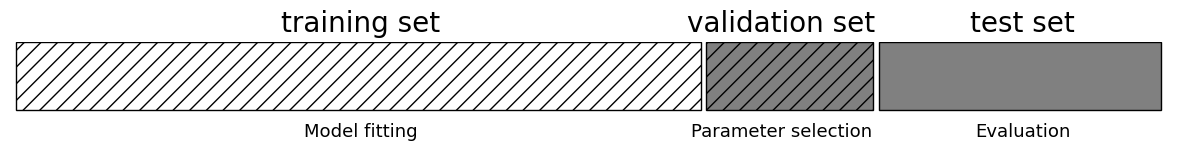

In [118]:
from mglearn import plots

plots.plot_threefold_split()

### Grid Search Overview

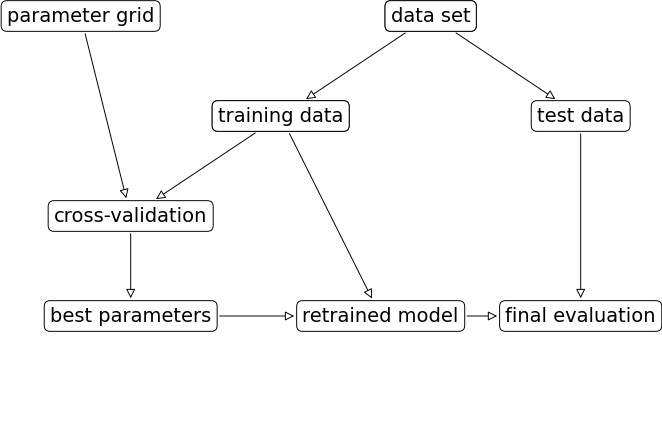

In [120]:
plots.plot_grid_search_overview()

## 2.2 Feature Selection Method, Hyperparameter Tuning and Accuracy

### 2.2.1 Feature Selection Method

#### 2.2.1.1 Random Forest Regressor

In [124]:
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestClassifier
clf = RandomForestRegressor(n_estimators=100)

# Fit the model
clf.fit(df_scaled.drop(columns=['Charges']), df_scaled['Charges'])

RandomForestRegressor()

In [125]:
from sklearn.feature_selection import SelectFromModel

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': df_scaled.drop(columns=['Charges']).columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

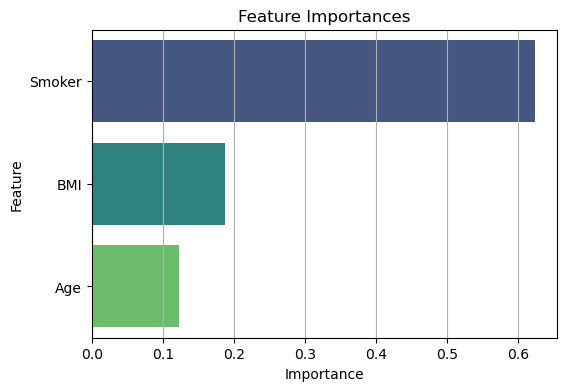

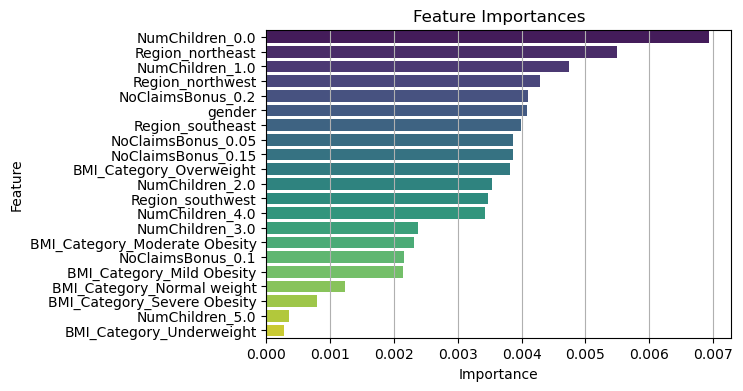

In [126]:
# Plotting using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_df[feature_importance_df['Feature'].isin(['Smoker', 'BMI', 'Age'])],
            palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.grid(axis='x')
plt.show()

# Plotting using Seaborn
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature',
            data=feature_importance_df[~feature_importance_df['Feature'].isin(['Smoker', 'BMI', 'Age'])],
            palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.grid(axis='x')
plt.show()

A Random Forest Regressor was used to identify the most important features. The features Smoker, BMI, and Age were found to be the most important.

### 2.2.2 Hyperparameter Tuning and Accuracy

Hyperparameter tuning was performed using GridSearchCV to find the optimal parameters for each model. The models were evaluated using cross-validation to ensure robust performance metrics.

#### 2.2.2.1 Train Test Split

In [131]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = df_scaled[['Smoker', 'BMI', 'Age']]

# Create target variable
y = df_scaled['Charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

The dataset was split into training, validation set and testing set to evaluate model performance.

#### 2.2.2.2 K-Neighbors Regressor, Hyperparameter Tuning and Accuracy

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# try n_neighbors from 1 to 10
param_grid = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.85


In [135]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.83


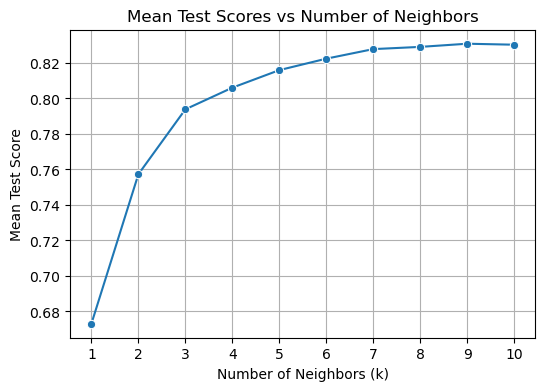

In [136]:
import pandas as pd
import seaborn as sns

# Create a DataFrame for plotting
data = pd.DataFrame({
    'n_neighbors': param_grid['n_neighbors'],
    'mean_test_score': grid_search.cv_results_['mean_test_score']
})

# Plotting using Seaborn
plt.figure(figsize=(6, 4))
sns.lineplot(data=data, x='n_neighbors', y='mean_test_score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.xticks(param_grid['n_neighbors'])
plt.title('Mean Test Scores vs Number of Neighbors')
plt.grid(True)
plt.show()

GridSearchCV was used to tune the hyperparameters of the K-Neighbors Regressor. The best parameters were found to be n_neighbors=9, achieving a test set score of 0.85.

#### 2.2.2.3 Linear Regression, Hyperparameter Tuning and Accuracy

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model  import LinearRegression

# define the parameter grid
param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.74


In [140]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'fit_intercept': False}
Best cross-validation score: 0.75


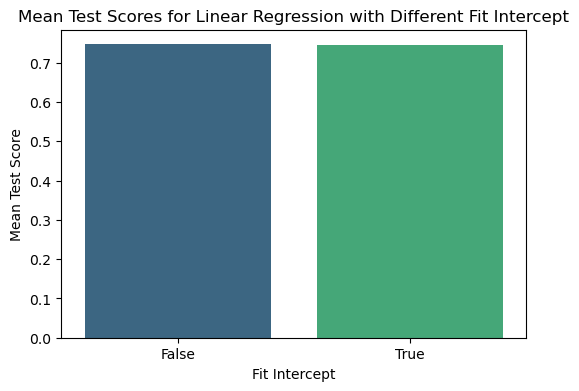

In [141]:
# Convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
mean_test_scores = results['mean_test_score']

# Plotting the mean test scores
plt.figure(figsize=(6, 4))
sns.barplot(x=results['param_fit_intercept'], y=mean_test_scores, palette='viridis')
plt.xlabel('Fit Intercept')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Scores for Linear Regression with Different Fit Intercept')
plt.show()

GridSearchCV was used to tune the hyperparameters of Linear Regression. The best parameters were fit_intercept=False, achieving a test set score of 0.74.

#### 2.2.2.4 Random Forest Regressor, Hyperparameter Tuning and Accuracy

In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# define the parameter grid
param_grid = {'n_estimators': [1, 10, 100], 'max_depth': [None, 10, 50, 100]}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.83


In [145]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 10, 'n_estimators': 100}
Best cross-validation score: 0.81


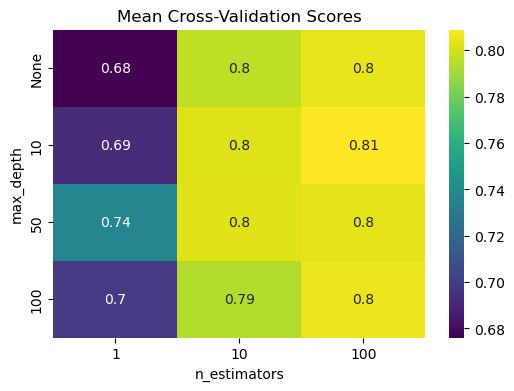

In [146]:
import pandas as pd
import seaborn as sns
import numpy as np

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# convert to numpy array
scores = np.array(results.mean_test_score).reshape(4, 3)
# plot the mean cross-validation scores
plt.figure(figsize=(6, 4))
param_grid['max_depth'][0] = 'None'
ax = sns.heatmap(scores, annot=True, cmap="viridis", xticklabels=param_grid['n_estimators'], yticklabels=param_grid['max_depth'])
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Mean Cross-Validation Scores')
plt.show()

GridSearchCV was used to tune the hyperparameters of the Random Forest Regressor. The best parameters were max_depth=10 and n_estimators=100, achieving a test set score of 0.83.

#### 2.2.2.5 Support Vector Regressor, Hyperparameter Tuning and Accuracy

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# define the parameter grid
param_grid = {'C': [0.1, 1, 10], 'epsilon': [0.01, 0.1, 1]}

grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.87


In [150]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'epsilon': 0.1}
Best cross-validation score: 0.84


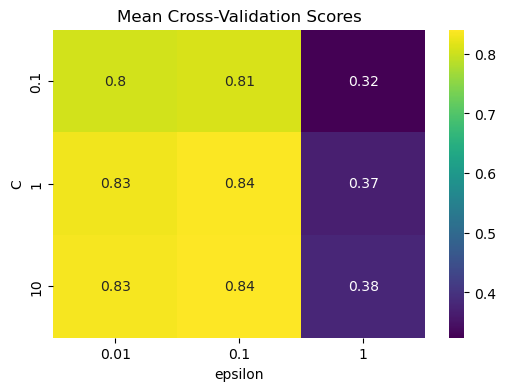

In [151]:
import pandas as pd
import seaborn as sns

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# convert to numpy array
scores = np.array(results.mean_test_score).reshape(3, 3)
# plot the mean cross-validation scores
plt.figure(figsize=(6, 4))
ax = sns.heatmap(scores, annot=True, cmap="viridis", xticklabels=param_grid['epsilon'], yticklabels=param_grid['C'])
plt.xlabel('epsilon')
plt.ylabel('C')
plt.title('Mean Cross-Validation Scores')
plt.show()

GridSearchCV was used to tune the hyperparameters of the Support Vector Regressor. The best parameters were C=10 and epsilon=0.1, achieving a test set score of 0.87.

## 2.3 K-Fold cross-validation

In [154]:
models = []
models.append(('K-NR', KNeighborsRegressor(n_neighbors=8)))
models.append(('LR', LinearRegression(fit_intercept=True)))
models.append(('RFR', RandomForestRegressor(n_estimators=100, max_depth=10)))
models.append(('SVR', SVR(C=10, epsilon=0.1)))

In [155]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

results = []
names = []

for name, model in models:
	kfold = KFold(n_splits=5, shuffle=True, random_state=42)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

K-NR: 0.829749 (0.041888)
LR: 0.744046 (0.055810)
RFR: 0.816324 (0.043620)
SVR: 0.837977 (0.045294)


K-Fold Cross-Validation was used to evaluate the models' performance. The Support Vector Regressor achieved the highest cross-validation score, followed by the K-Neighbors Regressor, Random Forest Regressor, and Linear Regression.

## 2.4 Machine Learning Modelling Outcomes

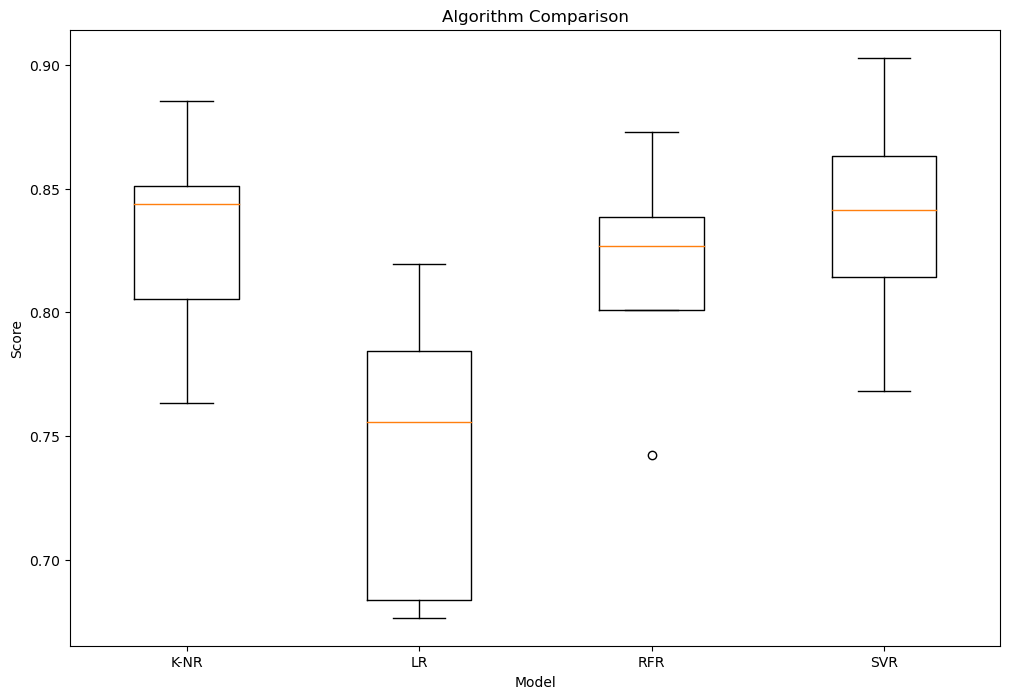

In [158]:
plt.figure(figsize=(12, 8))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

The Support Vector Regressor (SVR) with specific hyperparameters (C=10, epsilon=0.1) provided the best performance on the test set with a score of 0.87.

# Conclusion

The analysis demonstrated that the Support Vector Regressor is the best-performing model for predicting individual medical costs billed by health insurance. Key findings from the data include the significant impact of Smoker status, BMI, and Age on medical costs. Proper handling of missing values and careful feature engineering contributed to the models' performance.